# Lab: More K-Fold CV 
## CMSE 381 - Spring 2023
## Feb 8th,  2023. Lecture 12



In [47]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


# 2. CV for a classification data set
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. This data set was originally posted in R, but has helpfully been loaded as an easily readable python data set by installing the `palmerpenguins` package using `pip`. 



In [48]:
# You should only have to do this once:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [49]:
# If it worked, this should load our dataset
from palmerpenguins import load_penguins
import seaborn as sns
import matplotlib as plt

penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


As always, when playing with a new data set, your first job is to just get a feel for what's in the data. We're going to use this data to predict species of the penguin given the other information.

&#9989; **<font color=red>Questions:</font>** 
- How many penguins are in the data set? 
- What are the input variables? 
- What are the possible values of the output variable? 
- Which are categorical varaibales? Which are quantitative? 
- Are there any lines with missing data? How is missing data represented in this data set? 

*Your answers here*

##ANSWER##
- How many penguins are in the data set? *344*
- What are the input variables? *See the R link for more info*
- What are the possible values of the output variable? *Adelie, gentoo, and chinstrap*
- Which are categorical varaibales? Which are quantitative? *Categorical are island, sex. The rest are quantitative.*
- Are there any lines with missing data? *Yuppers*. 

&#9989; **<font color=red>Do this:</font>** Spoiler alert, there are penguins with missing data. Replace the `penguins` dataframe with one where you have removed all those lines. (*Hint: this should be a one line operation*)

In [50]:
# Your code here

In [51]:
##ANSWER##
penguins = penguins.dropna()
print(penguins.shape)
penguins.head()

(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Our next favorite thing to do with any data set is to start trying to visualize relationships between the variables. 

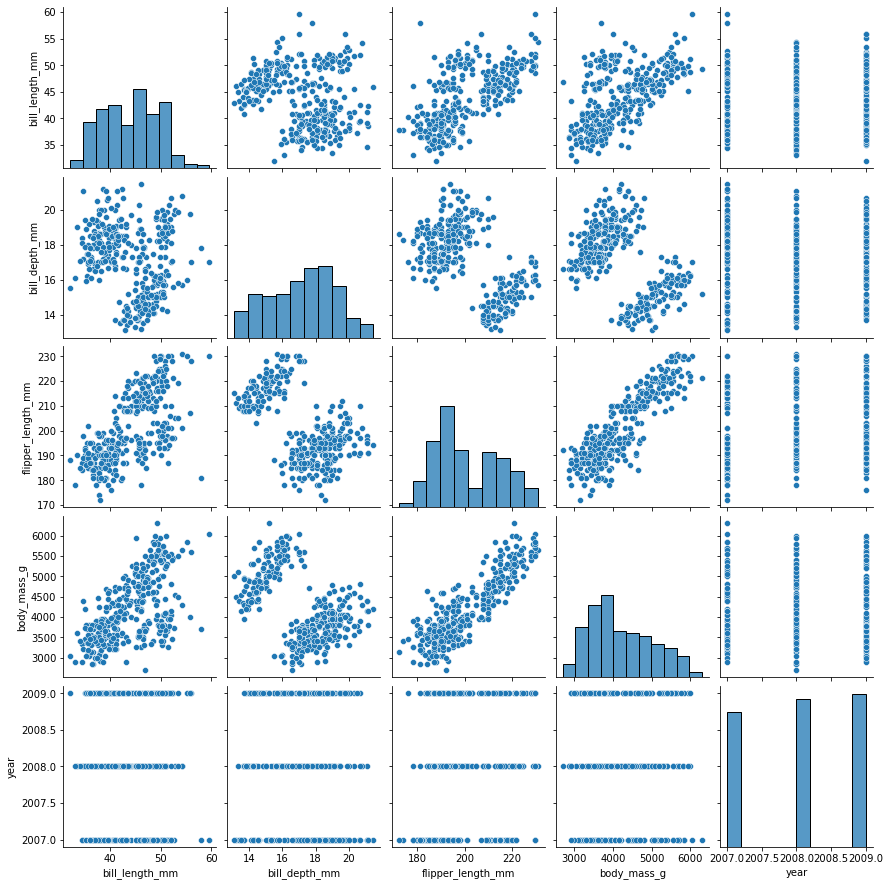

In [52]:
sns.pairplot(penguins)

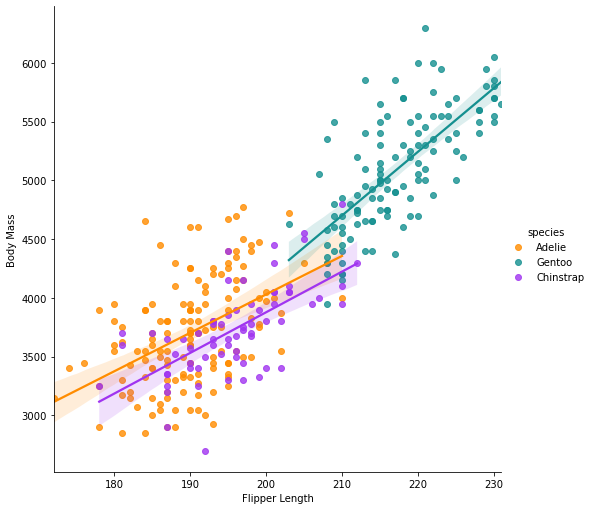

In [53]:
#Here is another nice visualization taken from the palmerpenguins github
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

## Step 1: Set up your arrays 

Ok, you have your penguins data frame.  
- Build an array $X$ with `island` and `sex` replaced with dummy variable(s)
- Save an array of the entries in `penguins.species` as $y$ (you can use the `name_of_series.values` command, or just make a list works too). 

In [24]:
# Your code here. Feel free to make more cells, I spread this out over at least 
# 5 while I was trying to get everything up and running. 

In [54]:
##ANSWER##
# The fast version!!!!
penguinsv1 = pd.get_dummies(penguins, columns = ['island','sex'],drop_first=True)
# penguinsv1 = penguinsv1.iloc[:,1:]
y = penguinsv1.species.values
penguinsv1 = penguinsv1.drop('species', axis = 1)
penguinsv1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,1,1


In [55]:
##ANSWER##
# Below here is my slower version to do everything manually
island_dummies = pd.get_dummies(penguins.island, prefix = 'island', drop_first = True)
penguins = penguins.join(island_dummies)


In [46]:
print(np.unique(penguins['island']))
island_dummies

['Biscoe' 'Dream' 'Torgersen']


,island_Dream,island_Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
339,1,0
340,1,0
341,1,0
342,1,0


In [56]:
##ANSWER##

sex_dummies = pd.get_dummies(penguins.sex, prefix='sex', drop_first = True)
penguins = penguins.join(sex_dummies)



In [58]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year', 'island_Dream',
       'island_Torgersen', 'sex_male'],
      dtype='object')

In [59]:
##ANSWER##

cols_to_keep = list(penguins.columns)
cols_to_keep.remove('species')
cols_to_keep.remove('island')
cols_to_keep.remove('sex')

print(cols_to_keep)
X = penguins[cols_to_keep].values
X

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year', 'island_Dream', 'island_Torgersen', 'sex_male']


array([[ 39.1,  18.7, 181. , ...,   0. ,   1. ,   1. ],
       [ 39.5,  17.4, 186. , ...,   0. ,   1. ,   0. ],
       [ 40.3,  18. , 195. , ...,   0. ,   1. ,   0. ],
       ...,
       [ 49.6,  18.2, 193. , ...,   1. ,   0. ,   1. ],
       [ 50.8,  19. , 210. , ...,   1. ,   0. ,   1. ],
       [ 50.2,  18.7, 198. , ...,   1. ,   0. ,   0. ]])

In [28]:
##ANSWER##

y = penguins.species.values
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [62]:
penguins.species.values

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

## Step 2: Run logistic regression

Ok, you have your penguins data with input variables as X and we are going to predict `penguins.species`. While `scikitlearn` cannot handle input variables that are categorical (hence why we had to put in our dummy variables ourselves), it's find with a predictor variable that is. The following code will fit a logistic regression on the whole data set. Of course, you know better than to actually do this to return your results, so in a moment we will be modifying this to get $k$-fold CV test errors. 

In [64]:
logisticmodel = LogisticRegression(max_iter = 1000) # Note, I needed to up the interations
                                                   # to get rid of a convergence warning
logisticmodel.fit(X, y)

LogisticRegression(max_iter=1000)

Also here's some helpful code to remember how to get accuracy/error rates out of classification modules in `scikitlearn`.

In [65]:
# and now we can also get the error rate on the training set. 
from sklearn.metrics import accuracy_score
yhat = logisticmodel.predict(X)
accuracy = accuracy_score(yhat, y)
# Note that accuracy is the percentage correct
print('Accuracy:', accuracy)
# so the percentage incorrect is
print('Error:', 1-accuracy)

# We can get the same info directly from the original model
print('\nAccuracy version 2:', logisticmodel.score(X,y))

Accuracy: 1.0
Error: 0.0

Accuracy version 2: 1.0


In [67]:
yhat = logisticmodel.predict(X)
yhat

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

&#9989; **<font color=red>Do this:</font>** Ok, your job, should you choose to accept it, is to 
- Train a model predicing `species` from all the input variables using logistic regression. 
- Use $k$-fold cross validation to determine the test error. I would recommend using something like $k=5$ to start building your code, but you can up it to $k=10$ when you want to see better results. 
- *Hint: while I was building my version, I had to set the `max_iter` for Logistic regression pretty high to get the model to converge. However, my error results were still pretty reasonable with lower `max_iter`, ignoring the massive amount of pink warning boxes. Feel free to mess around with this parameter to see how it affects your output.*

In [71]:
# Your code here
print(logisticmodel.predict(X_test))
print(y_test)


['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Chinstrap']
['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Chinstrap']


In [68]:
##ANSWER##
kf = KFold(n_splits=20, shuffle = True)

AllTestErrors = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logisticmodel = LogisticRegression(max_iter = 1500)
    logisticmodel.fit(X_train, y_train)
    
    error = 1-logisticmodel.score(X_test,y_test)
    AllTestErrors.append(error)
    
print(np.average(AllTestErrors))
    

0.003125


In [72]:
logisticmodel.score(X_test,y_test)


1.0



-----
### Congratulations, we're done!

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [33]:
##ANSWER## 
# This cell gets the name of the current notebook. Needs a sec
# to run before it works

from jupyterinstruct import InstructorNotebook
this_notebook = InstructorNotebook.getname()


##ANSWER## 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
##ANSWER##
#This cell runs the converter which removes ANSWER fields, renames the notebook and cleans out output fields. 

studentnotebook = InstructorNotebook.makestudent(this_notebook)
InstructorNotebook.validate(studentnotebook)

Myfilename CMSE381-Lec13-kfold_Classification-Coding-INSTRUCTOR.ipynb


CMSE381-Lec13_kfold_Classification_Coding.ipynb


Validating Notebook ./CMSE381-Lec13_kfold_Classification_Coding.ipynb
   ERROR: No Alt text in image - data:image/png;base64,iVBORw0KGgoAAAANSUhE..
   ERROR: No Alt text in image - data:image/png;base64,iVBORw0KGgoAAAANSUhE..


2